In [1]:
import matplotlib.pyplot as plt
import numpy as  np
import pandas as pd
import seaborn as sns

In [3]:
from google.colab import files

In [4]:
data=files.upload()

Saving titanic_dataset.csv to titanic_dataset.csv


In [5]:
data=pd.read_csv('titanic_dataset.csv')

In [6]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.shape

(891, 12)

In [9]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
data['FamMembers'] = data.SibSp+data.Parch

In [12]:
data.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamMembers
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


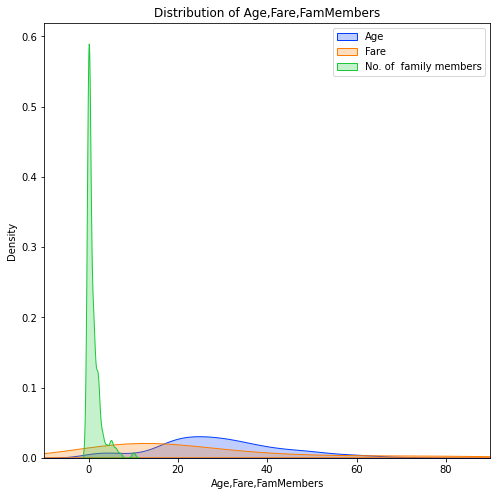

In [13]:
sns.set_palette("bright", 8, 1)
plt.figure(figsize=(8,8))

ax = sns.kdeplot(data['Age'],shade=True)
ax = sns.kdeplot(data['Fare'],shade=True)
ax = sns.kdeplot(data['FamMembers'],shade=True)

ax.set_xlim(-10, 90)
ax.set_xlabel('Age,Fare,FamMembers')
ax.set_title('Distribution of Age,Fare,FamMembers')
plt.legend(['Age','Fare','No. of  family members'])
plt.show()

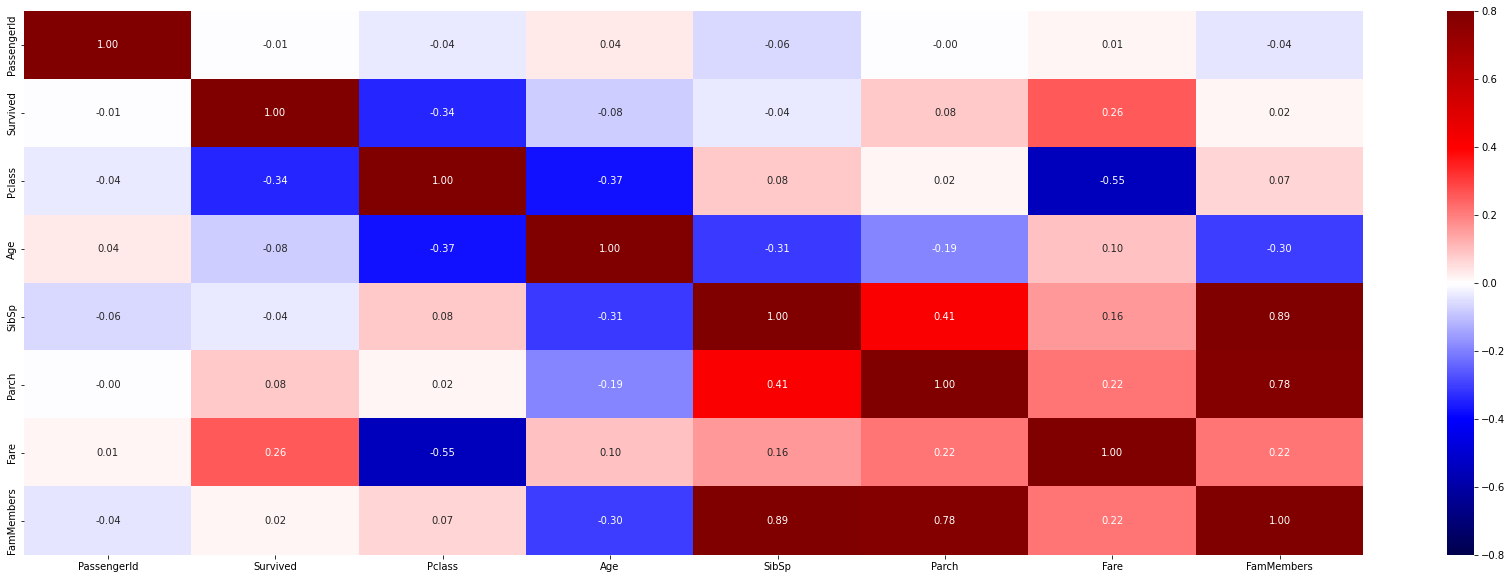

In [14]:
corr_matrix = data.corr()
plt.subplots(figsize= (30,10))
sns.heatmap(corr_matrix, fmt='.2f', annot=True, vmin= -0.8, vmax= 0.8, cmap='seismic')
plt.show()

In [15]:
data.Embarked.mode()

0    S
dtype: object

In [16]:
data[data['Embarked'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamMembers
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


In [17]:
data['Cabin'].fillna("Unknown", inplace=True)

In [18]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [19]:
data['Age'][data['Age'].isnull()==True]=data[data['Age'].isnull()==False].median()[0]

<ipython-input-19-eaccf88239d9>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['Age'][data['Age'].isnull()==True]=data[data['Age'].isnull()==False].median()[0]
<ipython-input-19-eaccf88239d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'][data['Age'].isnull()==True]=data[data['Age'].isnull()==False].median()[0]


In [20]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
FamMembers     0
dtype: int64

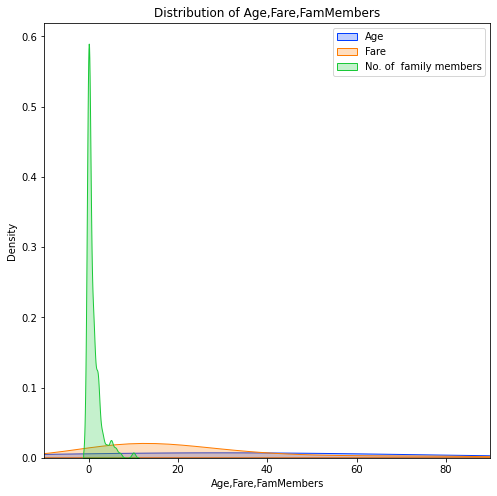

In [21]:
#sns.set_palette('Reds')
sns.set_palette("bright", 8, 1)
plt.figure(figsize=(8,8))

ax = sns.kdeplot(data['Age'],shade=True)
ax = sns.kdeplot(data['Fare'],shade=True)
ax = sns.kdeplot(data['FamMembers'],shade=True)

ax.set_xlim(-10, 90)
ax.set_xlabel('Age,Fare,FamMembers')
ax.set_title('Distribution of Age,Fare,FamMembers')
plt.legend(['Age','Fare','No. of  family members'])
plt.show()

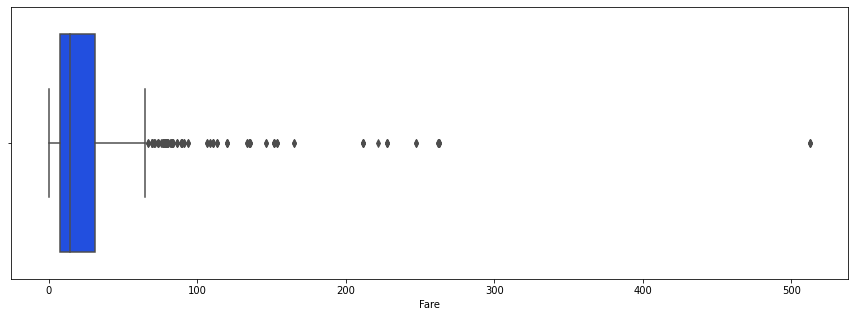

In [22]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data,x=data.Fare)
plt.show()

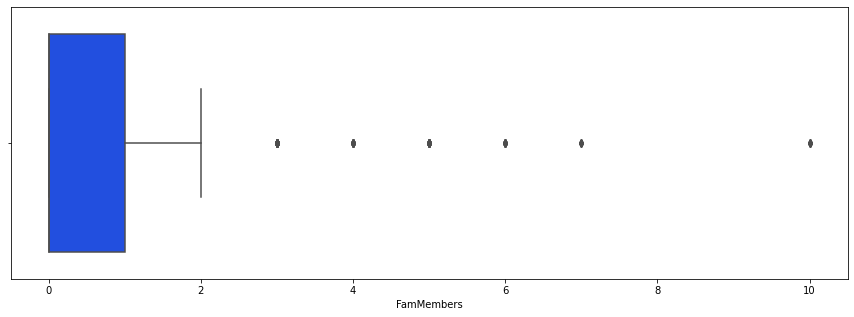

In [23]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data,x=data.FamMembers)
plt.show()

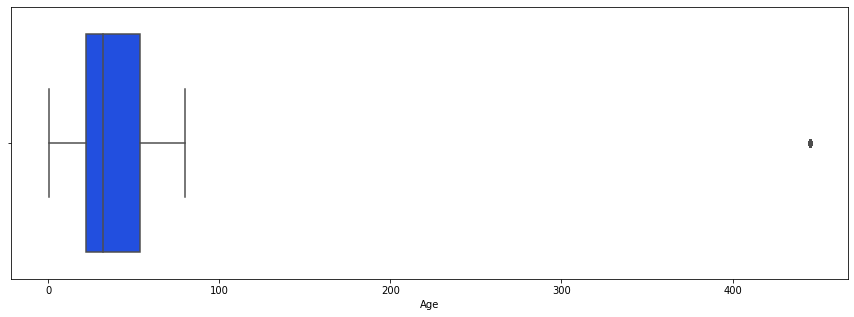

In [24]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data,x=data.Age)
plt.show()

In [25]:
IQR=data.FamMembers.quantile(0.75)-data.FamMembers.quantile(0.25)
low=data['FamMembers'].quantile(0.25)-(IQR*1.5)
upp=data['FamMembers'].quantile(0.75)+(IQR*1.5)
print(low)
print(upp)

-1.5
2.5


In [26]:
data.loc[data['FamMembers']>=2.5,'FamMembers']=2.5

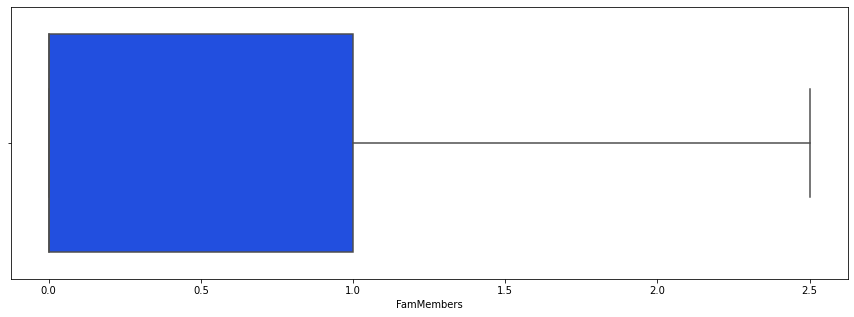

In [27]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data,x=data.FamMembers)
plt.show()

In [28]:
df=data.drop(["SibSp","Parch","Ticket",'Cabin',"Name",'Age','Fare'],axis=1)

In [29]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Embarked        object
FamMembers     float64
dtype: object

In [30]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [31]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [32]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
df=pd.get_dummies(df)

In [34]:
df.head(2)

,PassengerId,Survived,Pclass,FamMembers,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1.0,0,1,0,0,1
1,2,1,1,1.0,1,0,1,0,0


In [35]:
from sklearn.preprocessing import MinMaxScaler



In [36]:
min_max = MinMaxScaler(feature_range=(0,1))

In [37]:
x = min_max.fit_transform(df)

In [38]:
x

array([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.0011236 , 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.00224719, 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.99775281, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.9988764 , 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [42]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'FamMembers', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [43]:
x=pd.DataFrame(x,columns=['Survived', 'Pclass', 'FamMembers', 'Sex_female','Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'])

ValueError: ignored